

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão



---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

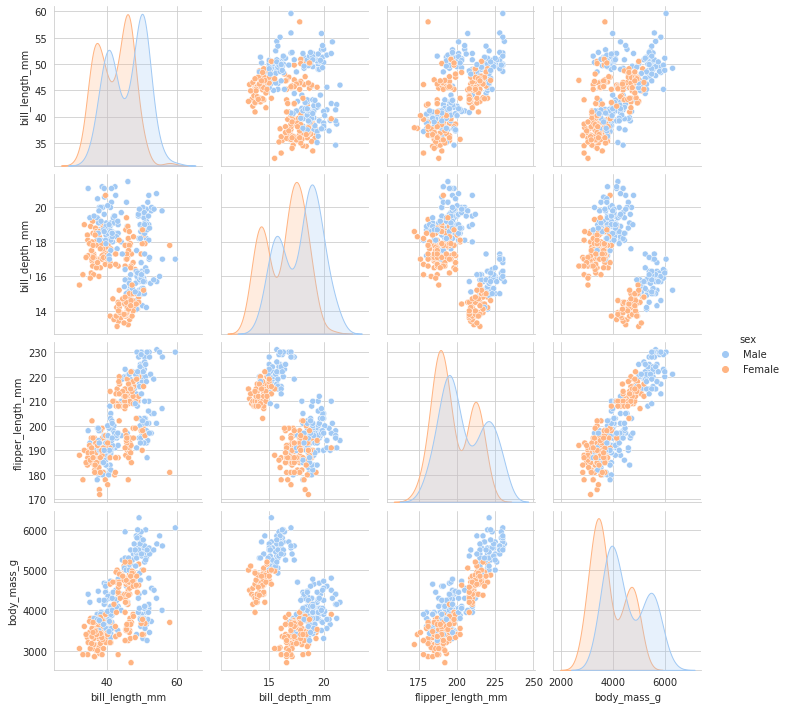

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** Machos em geral tem mais peso e extensão que as fêmeas. Há mais machos com os atributos como bill_length_mm ou flipper_length_mm que são acima do padrão, fora da box e que são quase "outliers" 

 - Atributos por espécie:

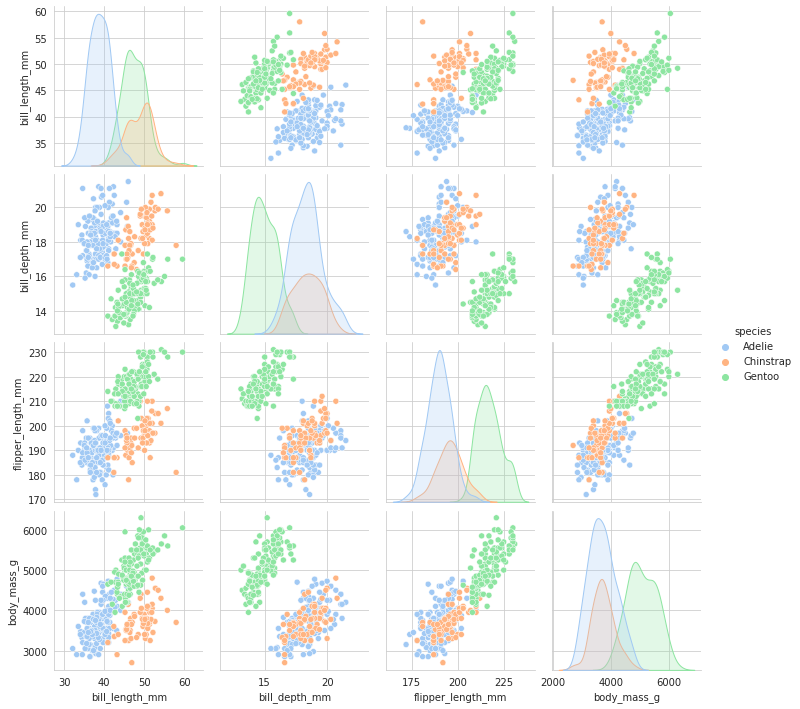

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** Adelle aparenta ser a espécie mais predominante em números. É também a espécie com maior bill_depth_mm. Chinstrap chega próximo a Gentoo em termos de bill_length_mm mas estes últimos são superiores em outros atributos, como flipper_length_mm e body_mass_g.
No geral Gentoo é a espécie com vitória em dois atributos euquanto Adelle tem a vitória em um atributo. Chinstrap não tem vitórias mas tem um "empate" com Gentoo em bill_length_mm

 - Atributos por ilha:

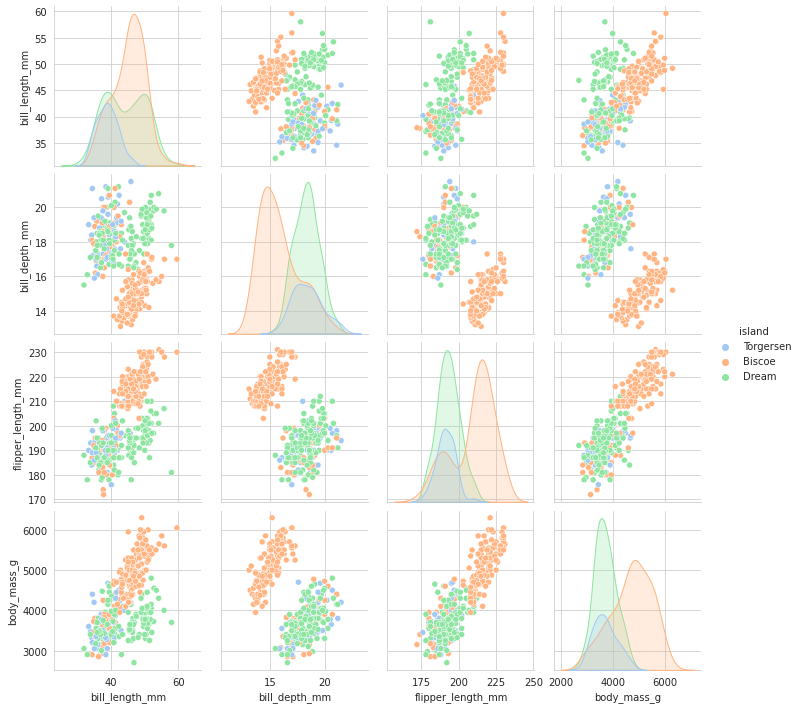

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** Biscoe é a ilha com maior body_mass_g dos animais. É também a ilha com maior flipper_length_mm (deve ser também a ilha com maior predominância da espécie Gentoo que também dominava nesses atributos). Biscoe também tem um empate técnico em bill_length_mm com Dream, enquanto que Torgersen tem "empate" com Dream em bill_depth_mm

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos para trata-los.

In [7]:
# resposta da questão 2.1

penguim.info()

#Apenas 2 elementos nos atributos bill_length_mm, bill_depth_mm, flipper_length_mm e body_mass_g com NaN. Basta eliminá-los
#Há também vários NaN em sex mas que não irão atrapalhar nossa base de dados

dataNew = penguim.dropna(subset=["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"], axis=0)
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length

### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [8]:
# resposta da questão 2.2

#Atributos numéricos são todos os atributos na lista com exceção de species, island e sex
#Tratando bill_length_mm	
media_bill_length_mm = dataNew['bill_length_mm'].mean()
print(media_bill_length_mm)

dp_bill_length_mm = dataNew['bill_length_mm'].std()
print(dp_bill_length_mm)

dataNew['bill_length_mm_std'] = dataNew['bill_length_mm'].apply(lambda bill: (bill - media_bill_length_mm) / (dp_bill_length_mm))
dataNew.head(10)

43.9219298245614
5.4595837139265315


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.883205
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.809939
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.663408
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.322799
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.846572
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,-0.919837
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,-0.864888
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,-1.799025
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,-0.352029
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,-1.121318


In [9]:
#Tratando bill_depth_mm	
media_bill_depth_mm	 = dataNew['bill_depth_mm'].mean()
print(media_bill_depth_mm)

dp_bill_depth_mm	 = dataNew['bill_depth_mm'].std()
print(dp_bill_depth_mm)

dataNew['bill_depth_mm_std'] = dataNew['bill_depth_mm'].apply(lambda bill: ((bill - media_bill_depth_mm) / (dp_bill_depth_mm)))
dataNew.head(10)

17.151169590643278
1.9747931568167814


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.883205,0.784300
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.809939,0.126003
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.663408,0.429833
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.322799,1.088129
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.846572,1.746426
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,-0.919837,0.328556
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,-0.864888,1.240044
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,-1.799025,0.480471
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,-0.352029,1.543873
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,-1.121318,-0.025911


In [10]:
#Tratando flipper_length_mm

media_flipper_length_mm	 = dataNew['flipper_length_mm'].mean()
print(media_flipper_length_mm)

dp_flipper_length_mm = dataNew['flipper_length_mm'].std()
print(dp_flipper_length_mm)

dataNew['flipper_length_mm_std'] = dataNew['flipper_length_mm'].apply(lambda bill:(bill - media_flipper_length_mm) / (dp_flipper_length_mm))
dataNew.head(10)

200.91520467836258
14.061713679356886


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.883205,0.784300,-1.416272
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.809939,0.126003,-1.060696
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.663408,0.429833,-0.420660
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.322799,1.088129,-0.562890
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.846572,1.746426,-0.776236
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,-0.919837,0.328556,-1.416272
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,-0.864888,1.240044,-0.420660
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,-1.799025,0.480471,-0.562890
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,-0.352029,1.543873,-0.776236
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,-1.121318,-0.025911,-1.060696


### **2.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [11]:
# resposta da questão 2.3

#As variáveis categóricas nominais são species, island e sex. Não há variáveis ordinais nesse dataframe

#tratando o sex
dataNew['sex_m_nom'] = dataNew['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
dataNew['sex_f_nom'] = dataNew['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

dataNew.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.883205,0.784300,-1.416272,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.809939,0.126003,-1.060696,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.663408,0.429833,-0.420660,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.322799,1.088129,-0.562890,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.846572,1.746426,-0.776236,1,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,-0.919837,0.328556,-1.416272,0,1
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,-0.864888,1.240044,-0.420660,1,0
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,-1.799025,0.480471,-0.562890,0,0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,-0.352029,1.543873,-0.776236,0,0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,-1.121318,-0.025911,-1.060696,0,0


In [12]:
#tratando o species

dataNew['species_Adelie_nom'] = dataNew['species'].apply(lambda species: 1 if species == 'Adelie' else 0)
dataNew['species_Gentoo_nom'] = dataNew['species'].apply(lambda species: 1 if species == 'Gentoo' else 0)
dataNew['species_Chinstrap_nom'] = dataNew['species'].apply(lambda species: 1 if species == 'Chinstrap' else 0)

dataNew.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,species_Adelie_nom,species_Gentoo_nom,species_Chinstrap_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.883205,0.784300,-1.416272,1,0,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.809939,0.126003,-1.060696,0,1,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.663408,0.429833,-0.420660,0,1,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.322799,1.088129,-0.562890,0,1,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.846572,1.746426,-0.776236,1,0,1,0,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,-0.919837,0.328556,-1.416272,0,1,1,0,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,-0.864888,1.240044,-0.420660,1,0,1,0,0
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,-1.799025,0.480471,-0.562890,0,0,1,0,0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,-0.352029,1.543873,-0.776236,0,0,1,0,0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,-1.121318,-0.025911,-1.060696,0,0,1,0,0


In [13]:
#tratando island

dataNew['island_Dream_nom'] = dataNew['island'].apply(lambda island: 1 if island == 'Dream' else 0)
dataNew['island_Torgersen_nom'] = dataNew['island'].apply(lambda island: 1 if island == 'Torgersen' else 0)
dataNew['island_Biscoe_nom'] = dataNew['island'].apply(lambda island: 1 if island == 'Biscoe' else 0)

dataNew.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,species_Adelie_nom,species_Gentoo_nom,species_Chinstrap_nom,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.883205,0.784300,-1.416272,1,0,1,0,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.809939,0.126003,-1.060696,0,1,1,0,0,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.663408,0.429833,-0.420660,0,1,1,0,0,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.322799,1.088129,-0.562890,0,1,1,0,0,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.846572,1.746426,-0.776236,1,0,1,0,0,0,1,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,-0.919837,0.328556,-1.416272,0,1,1,0,0,0,1,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,-0.864888,1.240044,-0.420660,1,0,1,0,0,0,1,0
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,-1.799025,0.480471,-0.562890,0,0,1,0,0,0,1,0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,-0.352029,1.543873,-0.776236,0,0,1,0,0,0,1,0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,-1.121318,-0.025911,-1.060696,0,0,1,0,0,0,1,0


### **2.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [14]:
# resposta da questão 2.4

dataFinal = dataNew.drop(columns=["species", "island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm",  "sex"],axis=1)

dataFinal.head()


,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,species_Adelie_nom,species_Gentoo_nom,species_Chinstrap_nom,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom
0,3750.0,-0.883205,0.784300,-1.416272,1,0,1,0,0,0,1,0
1,3800.0,-0.809939,0.126003,-1.060696,0,1,1,0,0,0,1,0
2,3250.0,-0.663408,0.429833,-0.420660,0,1,1,0,0,0,1,0
4,3450.0,-1.322799,1.088129,-0.562890,0,1,1,0,0,0,1,0
5,3650.0,-0.846572,1.746426,-0.776236,1,0,1,0,0,0,1,0


### **2.5. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [16]:
# resposta da questão 2.5

from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split(
    dataFinal.drop(['body_mass_g'], axis=1), 
    dataFinal['body_mass_g'], 
    test_size=1/3, 
    random_state=123
)


In [17]:
predictors_train.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,species_Adelie_nom,species_Gentoo_nom,species_Chinstrap_nom,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom
204,0.325679,0.075365,-0.562890,0,1,0,0,1,1,0,0
297,1.314765,-0.431017,1.357217,1,0,0,1,0,0,0,1
149,-1.121318,0.480471,-0.562890,1,0,1,0,0,1,0,0
79,-0.333712,0.986853,-0.420660,1,0,1,0,0,0,1,0
267,1.204867,-0.633570,1.712792,1,0,0,1,0,0,0,1


In [18]:
predictors_train.shape

(228, 11)

In [19]:
predictors_test.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,species_Adelie_nom,species_Gentoo_nom,species_Chinstrap_nom,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom
182,-0.553509,-0.279102,-0.989581,0,1,0,0,1,1,0,0
304,0.179147,-1.696972,0.788296,0,1,0,1,0,0,0,1
334,0.417261,-1.545058,1.143872,0,1,0,1,0,0,0,1
310,0.655374,-1.089314,1.214987,0,1,0,1,0,0,0,1
171,0.966753,0.531109,-0.420660,1,0,0,0,1,1,0,0


In [20]:
predictors_test.shape

(114, 11)

In [21]:
target_train.head()

204    3600.0
297    6000.0
149    3750.0
79     4000.0
267    5400.0
Name: body_mass_g, dtype: float64

In [22]:
target_train.shape

(228,)

In [23]:
target_test.head()

182    3200.0
304    4750.0
334    4375.0
310    4950.0
171    4400.0
Name: body_mass_g, dtype: float64

In [24]:
target_test.shape

(114,)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [25]:
# resposta da questão 3.1

#pacote Scikit-Learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model = model.fit(predictors_train, target_train)
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'sex_m_nom', 'sex_f_nom', 'species_Adelie_nom',
        'species_Gentoo_nom', 'species_Chinstrap_nom', 'island_Dream_nom',
        'island_Torgersen_nom', 'island_Biscoe_nom'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 105.55797714,  129.54875983,  252.40308912,  287.04298799,
         -69.21794949, -212.43318268,  692.42288846, -479.98970578,
         -19.58554239,   -7.1152614 ,   26.70080379]),
 '_residues': array([], dtype=float64),
 'rank_': 9,
 'singular_': array([2.41969810e+01, 1.65509208e+01, 1.09207508e+01, 6.08486508e+00,
        5.82887321e+00, 5.33090623e+00, 3.13115395e+00, 2.09276844e+00,
        1.75425261e+00, 1.59908514e-15, 9.10480042e-16]),
 'intercept_': 4021.93801778326}

In [26]:
a = model.coef_
print(a)

[ 105.55797714  129.54875983  252.40308912  287.04298799  -69.21794949
 -212.43318268  692.42288846 -479.98970578  -19.58554239   -7.1152614
   26.70080379]


In [27]:
b = model.intercept_
print(b)

4021.93801778326


### **3.2. Avaliação** 

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [28]:
# resposta da questão 3.2

from sklearn.metrics import mean_squared_error

target_predicted = model.predict(predictors_test)

rmse= np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

292.69235781947623


## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [29]:
# resposta da questão 4.1
#processar os dados

new_bill_length_mm = 38.2
new_bill_depth_mm = 18.1
new_flipper_length_mm = 185.0

new_bill_length_mm_std = (new_bill_length_mm - media_bill_length_mm) / (dp_bill_length_mm)
print(new_bill_length_mm_std)
new_bill_depth_mm_std = (new_bill_depth_mm - media_bill_depth_mm) / (dp_bill_depth_mm)
print(new_bill_depth_mm_std)
new_flipper_length_mm_std = (new_flipper_length_mm - media_flipper_length_mm) / (dp_flipper_length_mm)
print(new_flipper_length_mm_std)

peso_encontrado = np.array([new_bill_length_mm_std, new_bill_depth_mm_std, new_flipper_length_mm_std, 1, 0, 1, 0, 0, 0, 0, 1])
print(peso_encontrado)

-1.0480524018645716
0.48047078048729275
-1.1318111747451303
[-1.0480524   0.48047078 -1.13181117  1.          0.          1.
  0.          0.          0.          0.          1.        ]


In [30]:
peso = model.predict(peso_encontrado.reshape(1, -1))
print(peso)

[3789.19009235]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


---